In [55]:
#  _____  ___   ____  ______  __ __  ____     ___       _____   ___  _        ___    __ ______  ____  ___   ____  
# |     |/  _] /    ||      ||  |  ||    \   /  _]     / ___/  /  _]| |      /  _]  /  ]      ||    |/   \ |    \ 
# |   __/  [_ |  o  ||      ||  |  ||  D  ) /  [_     (   \_  /  [_ | |     /  [_  /  /|      | |  ||     ||  _  |
# |  |_|    _]|     ||_|  |_||  |  ||    / |    _]     \__  ||    _]| |___ |    _]/  / |_|  |_| |  ||  O  ||  |  |
# |   _]   [_ |  _  |  |  |  |  :  ||    \ |   [_      /  \ ||   [_ |     ||   [_/   \_  |  |   |  ||     ||  |  |
# |  | |     ||  |  |  |  |  |     ||  .  \|     |     \    ||     ||     ||     \     | |  |   |  ||     ||  |  |
# |__| |_____||__|__|  |__|   \__,_||__|\_||_____|      \___||_____||_____||_____|\____| |__|  |____|\___/ |__|__| 
# Lab II (Module II), Applied Machine Learning (DT4031)

# Please read lab instruction PDF and follow tasks in section "Lab Assignment"

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import sys

# plt.style.use('dark_background')

In [57]:
# k as in k for the k-NN model (number of neighbous)
k = 13
n_features = 100

# Generating the dataset
X, y = make_regression(n_samples=1000, n_features=n_features, n_informative=10, n_targets=1, bias=2.0, effective_rank=10, tail_strength=0.9, noise=0.9, shuffle=True, coef=False, random_state=42)
X = stats.zscore(X)

In [58]:
# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [59]:
# Train both models using ALL 100 features
model_knn = KNeighborsRegressor(n_neighbors=k)
model_knn.fit(X_train, y_train)

model_lin_regr = LinearRegression()
model_lin_regr = model_lin_regr.fit(X_train, y_train)

In [60]:
# Predict the targets for the test set for the two learning algorithms
predictions_knn_test = model_knn.predict(X_test)
predictions_linreg_test = model_lin_regr.predict(X_test)

In [61]:
# Calculate the training set scores
R2_knn_train = model_knn.score(X_train, y_train)
R2_linreg_train= model_lin_regr.score(X_train, y_train)

# Calculate the test set scores
R2_knn_test = model_knn.score(X_test, y_test)
R2_linreg_test = model_lin_regr.score(X_test, y_test)

In [62]:
# Printing the R2 scores
print("*** Training scores ***")
print(f"R2 Sore for kNN on train set: {R2_knn_train}")
print(f"R2 Sore for LR on train set: {R2_linreg_train}\n")

print("*** Testing scores ***")
print(f"R2 Sore for kNN on test set: {R2_knn_test}")
print(f"R2 Sore for LR on test set: {R2_linreg_test}")

*** Training scores ***
R2 Sore for kNN on train set: 0.3917233575977177
R2 Sore for LR on train set: 0.9236080482375946

*** Testing scores ***
R2 Sore for kNN on test set: 0.23069202851873272
R2 Sore for LR on test set: 0.8757443890517073


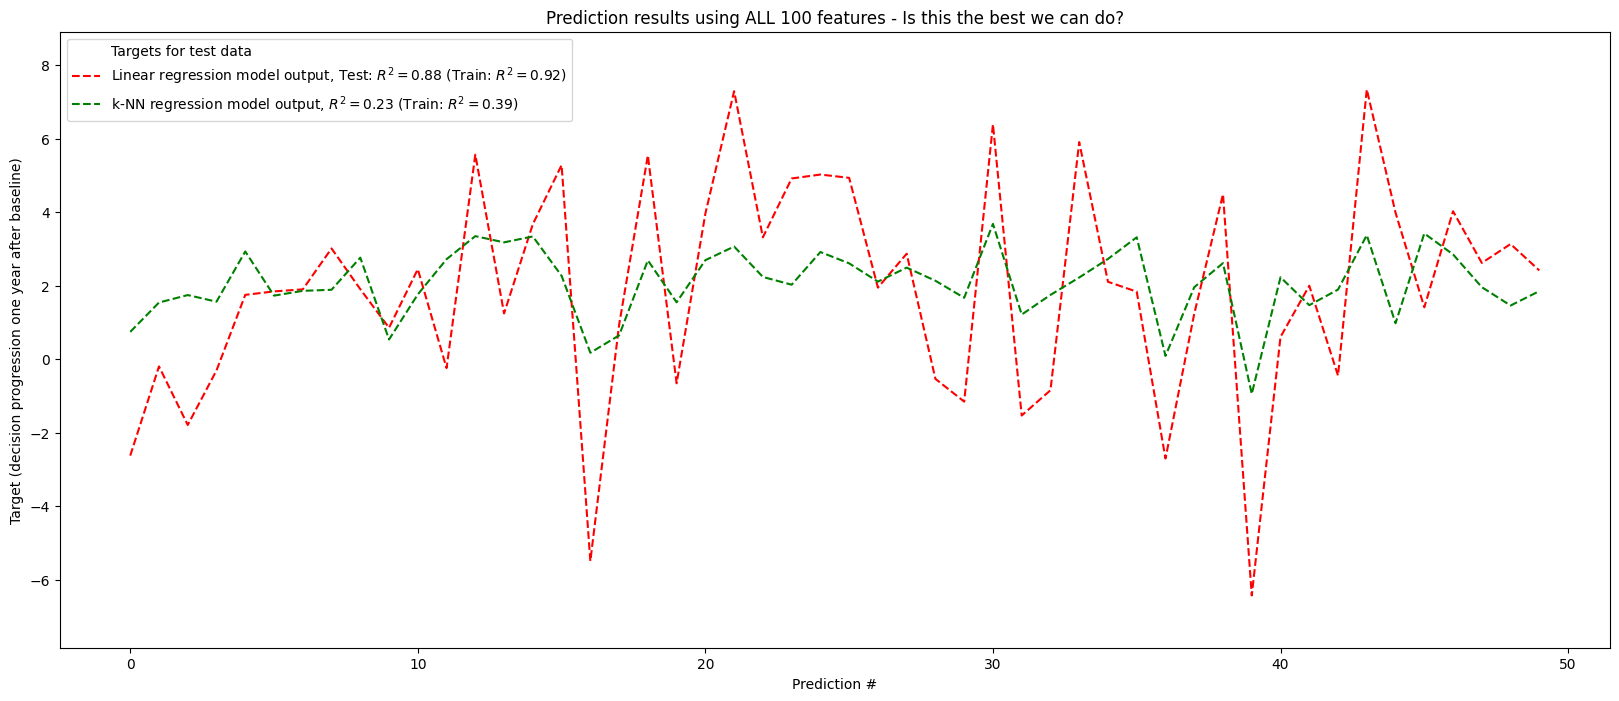

In [63]:
# Plot predictions for the models using ALL the features
plt.figure(figsize=(20,8))
plt.plot(y_test[0:50], 'w', label='Targets for test data')
plt.plot(predictions_linreg_test[0:50], 'r--', label='Linear regression model output, Test: $R^2=%2.2f$ (Train: $R^2=%2.2f$)' % (R2_linreg_test, R2_linreg_train))
plt.plot(predictions_knn_test[0:50], 'g--', label='k-NN regression model output, $R^2=%2.2f$ (Train: $R^2=%2.2f$)' % (R2_knn_test, R2_knn_train))
plt.legend()
plt.title("Prediction results using ALL 100 features - Is this the best we can do?")
plt.xlabel("Prediction #")
plt.ylabel("Target (decision progression one year after baseline)")
plt.show()

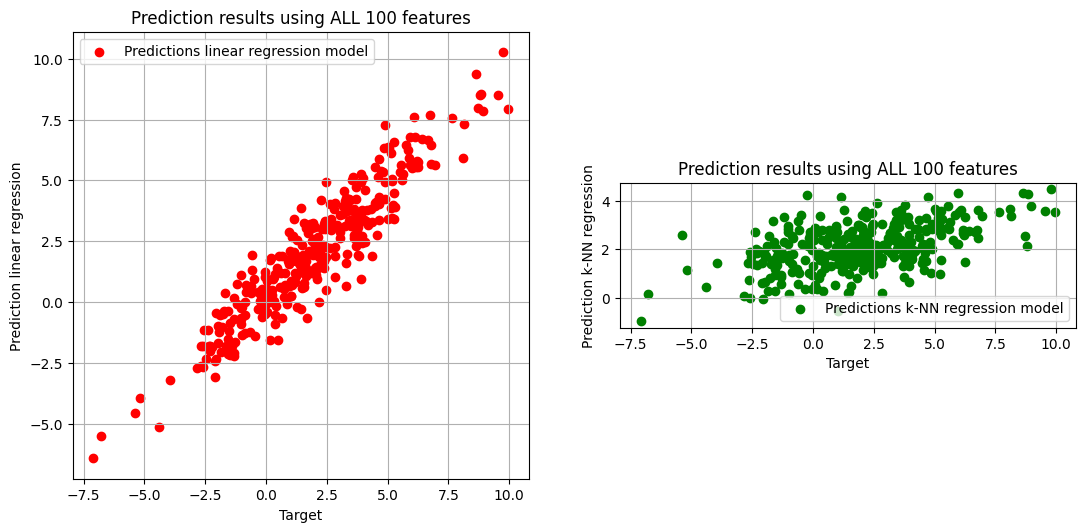

In [64]:
# Plot predictions and targets in a scatter plot
plt.figure(figsize=(20,10))

ax = plt.subplot(1,3,1)
ax.set_aspect('equal', adjustable='box')
plt.scatter(y_test, predictions_linreg_test, c='r', label="Predictions linear regression model")
plt.legend()
plt.title("Prediction results using ALL 100 features")
plt.xlabel("Target")
plt.ylabel("Prediction linear regression")
plt.grid()

ax = plt.subplot(1,3,2)
ax.set_aspect('equal', adjustable='box')
plt.scatter(y_test, predictions_knn_test, c='g', label="Predictions k-NN regression model")
plt.legend()
plt.title("Prediction results using ALL 100 features")
plt.xlabel("Target")
plt.ylabel("Prediction k-NN regression")
plt.grid()

In [65]:
def find_uninformative_feature_index(X_tr, y_tr, X_va, y_va, n_features, k_neighb, ml_algo_type):
    
    if ml_algo_type == 'linear':
        ml_regression_model = LinearRegression()
    elif ml_algo_type == 'knn':
        ml_regression_model = KNeighborsRegressor(n_neighbors=k_neighb)
    else:
        print("Invalid ML algorithm type (should be either linear or knn)")
        return -1, -1 

    feature_index_list = [i for i in range(n_features)]
    rsquareds = {}
    for feature_index in feature_index_list:
        feature_index_list_minus_feat_index = feature_index_list.copy()
        feature_index_list_minus_feat_index.remove(feature_index)
        rsquareds[feature_index] = ml_regression_model.fit(X_tr[:,feature_index_list_minus_feat_index], y_tr).score(X_va[:, feature_index_list_minus_feat_index], y_va)
    
    feature_index_to_remove = max(rsquareds, key=rsquareds.get)
    r2_score_for_model_when_feature_removed = rsquareds[max(rsquareds, key=rsquareds.get)]
        
    return feature_index_to_remove, r2_score_for_model_when_feature_removed

In [66]:
feature_numb, r2 = find_uninformative_feature_index(X_train, y_train, X_test, y_test,  n_features, k_neighb=3, ml_algo_type='linear')

print(feature_numb, r2)

69 0.8776025924859708


In [67]:
#    if stopping_condition:

#        tot_iter = n_features-stopping_condition
#        all_r2s = []
#        removed_features = []
#  
#        for i in range(tot_iter):
            
#            feature_numb, r2 = find_uninformative_feature_index(X_tr, y_tr, X_va, y_va, n_features, k_neighb=k_neighb, ml_algo_type=ml_algo_type)
#            n_features -= 1

#            X_tr, X_va = np.delete(X_tr, feature_numb, axis=1), np.delete(X_va, feature_numb, axis=1)

#            all_r2s.append(r2)
#            removed_features.append(feature_numb)
            
#            progress = ((i+1) / tot_iter) * 100
#            sys.stdout.write(f"\rRunning program iteration {i+1}/{tot_iter} [{progress:.2f}%]")  
#            sys.stdout.flush()
        
#        return X_tr, X_va, all_r2s, removed_features

In [68]:
def feature_removal(X_tr, y_tr, X_va, y_va, n_features=100, k_neighb=3, ml_algo_type='linear', stopping_condition=10):
    max_iters = 100
    all_r2s = []
    removed_features = []

    for i in range(max_iters):            
        X_tr_prev, X_va_prev = X_tr.copy(), X_va.copy()

        feature_numb, r2 = find_uninformative_feature_index(X_tr, y_tr, X_va, y_va, n_features, k_neighb=k_neighb, ml_algo_type=ml_algo_type)
        n_features -= 1

        X_tr, X_va = np.delete(X_tr, feature_numb, axis=1), np.delete(X_va, feature_numb, axis=1)

        all_r2s.append(r2)
        removed_features.append(feature_numb)
        
        progress = ((i+1) / max_iters) * 100
        sys.stdout.write(f"\rRunning program iteration {i+1}/{max_iters} (max iterations) [{progress:.2f}%] (of potential wait time)")  
        sys.stdout.flush()

        if len(all_r2s) >= 2 and all_r2s[-1] < all_r2s[-2]:
            all_r2s.pop()
            return X_tr_prev, X_va_prev, all_r2s, removed_features
            
    return X_tr, X_va, all_r2s, removed_features

In [69]:
# Run feature selction code using KNN
X_train_optimized_kNN, X_test_optimized_kNN, all_r2_kNN, removed_features_KNN = feature_removal(X_train, 
                                                                                y_train, 
                                                                                X_test, 
                                                                                y_test, 
                                                                                n_features=X_train.shape[1], 
                                                                                k_neighb=k, 
                                                                                ml_algo_type='knn', 
                                                                                stopping_condition=None)

# Retrain the KNN model on the most informative features and print statistics
kNN_model = KNeighborsRegressor() 
kNN_model.fit(X_train_optimized_kNN, y_train)

Running program iteration 16/100 (max iterations) [16.00%] (of potential wait time)

KNeighborsRegressor()

In [70]:
# Making prediction with the kNN model after feature removal
predicted_test_KNN = kNN_model.predict(X_test_optimized_kNN)
predicted_train_KNN = kNN_model.predict(X_train_optimized_kNN)

mse_knn = np.mean((predicted_test_KNN - y_test)**2)
mae_knn = np.mean(abs(predicted_test_KNN - y_test))

test_r2_KNN = r2_score(y_test, predicted_test_KNN)
train_r2_KNN = r2_score(y_train, predicted_train_KNN)

#print(f"\nNumber of features left after feature selection are [{X_train_optimized_kNN.shape[1]}] and the r2 for the final models fit is [{all_r2_kNN[-1]:.4f}].")
#print(f"Final models performance increase/decrease after feature selection {all_r2_kNN[-1] - all_r2_kNN[0]:.4f}")
#print()

print(f"Mean Squared Error of the model is {mse_knn:.4f}")
print(f"Mean Absolute Error of the model is {mae_knn:.4f}")
print()
print(f"training r2 of the feature reduced model is: {train_r2_KNN:.4f}")
print(f"test r2 of the feature reduced model is: {test_r2_KNN:.4f}")

Mean Squared Error of the model is 6.1653
Mean Absolute Error of the model is 1.9944

training r2 of the feature reduced model is: 0.5172
test r2 of the feature reduced model is: 0.2230


In [71]:
# Run feature selection code using Linear Regression
X_train_optimized_LR, X_test_optimized_LR, all_r2_LR, removed_features_LR = feature_removal(X_train, 
                                                                                        y_train, 
                                                                                        X_test, 
                                                                                        y_test, 
                                                                                        n_features=X_train.shape[1], 
                                                                                        k_neighb=k, 
                                                                                        ml_algo_type='linear', 
                                                                                        stopping_condition=None)

# Retrain the Linear Regression model on the most informative features and print statistics
model = LinearRegression() 
lr_model_fit = model.fit(X_train_optimized_LR, y_train)

Running program iteration 61/100 (max iterations) [61.00%] (of potential wait time)

In [72]:
# Making prediction with the LR model after feature removal
predicted_test_LR = lr_model_fit.predict(X_test_optimized_LR)
predicted_train_LR = lr_model_fit.predict(X_train_optimized_LR)

mse_lr = np.mean((predicted_test_LR - y_test)**2)
mae_lr = np.mean(abs(predicted_test_LR - y_test))

test_r2_LR = r2_score(y_test, predicted_test_LR)
train_r2_LR = r2_score(y_train, predicted_train_LR)

#print(f"\nNumber of features left after feature selection are [{X_train_optimized_LR.shape[1]}] and the r2 for the final models fit is [{all_r2_LR[-1]:.4f}].")
#print(f"Final models performance increase/decrease after feature selection {all_r2_LR[-1] - all_r2_LR[0]:.4f}")
#print()

print(f"Mean Squared Error of the model is {mse_lr:.4f}")
print(f"Mean Absolute Error of the model is {mae_lr:.4f}")
print()
print(f"Training r2 of the feature reduced LR model is: {train_r2_LR:.4f}")
print(f"Test r2 of the feature reduced LR model is: {test_r2_LR:.4f}")

Mean Squared Error of the model is 0.8220
Mean Absolute Error of the model is 0.7298

Training r2 of the feature reduced LR model is: 0.9153
Test r2 of the feature reduced LR model is: 0.8964
